In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scipy import stats

In [3]:
# windows용 한글 폰트 오류 해결
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc("font", family = font_name)

In [5]:
total = pd.read_csv("./data/metro/data/1-9호선 통합본(2).csv")

In [11]:
bic = total[["역명","노선명","자전거보관소 대수","평균승차총승객수","평균하차총승객수","물품보관함 개수","평균역이용자수"]]

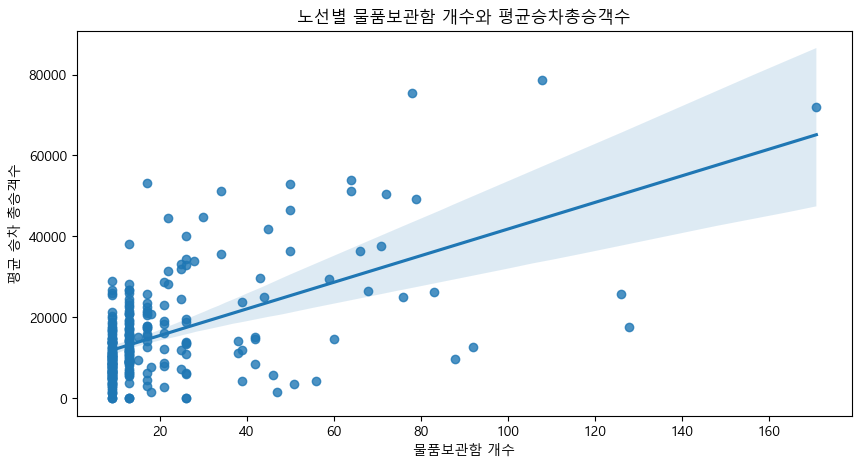

In [15]:
plt.figure(figsize=(10, 5))
sns.regplot(x='물품보관함 개수', y='평균승차총승객수', data=bic)
plt.xlabel("물품보관함 개수")
plt.ylabel("평균 승차 총승객수")
plt.title("노선별 물품보관함 개수와 평균승차총승객수")
plt.show()

In [23]:
bic2 = total[["물품보관함 개수","평균승차총승객수","평균하차총승객수","노선명"]]

In [17]:
nosun = total.groupby("노선명")[["물품보관함 개수"]].sum()

In [19]:
nosun2 = nosun.reset_index()

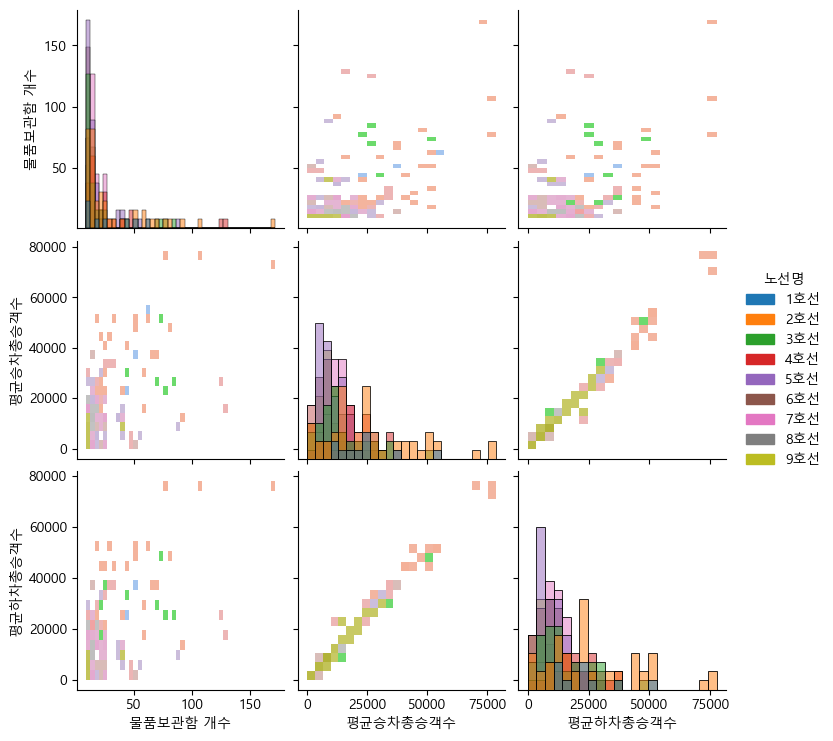

In [25]:
fig = sns.pairplot(bic2, hue="노선명", kind="hist")

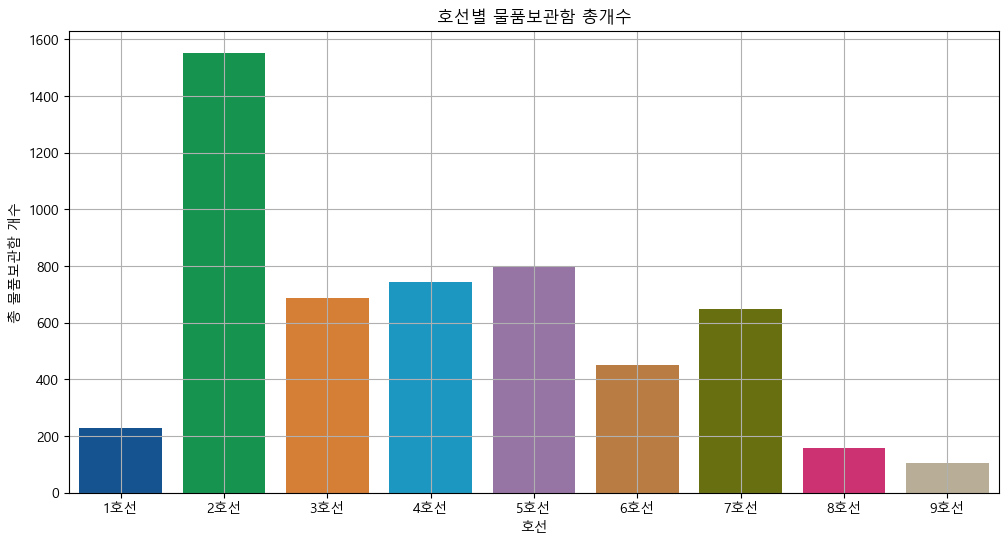

In [33]:
line_box = total.groupby('노선명')['물품보관함 개수'].sum().reset_index()
colors = ["#0052A4","#00A84D","#EF7C1C","#00A5DE","#996CAC","#CD7C2F","#747F00","#E6186C","#BDB092"]
sns.set_palette(sns.color_palette(colors))

plt.figure(figsize=(12, 6))
sns.barplot(x='노선명', y='물품보관함 개수', hue = '노선명', data=line_box, palette=colors)
plt.xlabel("호선")
plt.ylabel("총 물품보관함 개수")
plt.title("호선별 물품보관함 총개수")
plt.grid()
plt.show()

# 호선별로 물품 보관함 총개수를 보면 9호선이 압도적으로 많고 다음으로 5호선, 4호선, 3호선, 7호선을 눈여겨 볼만하다

In [39]:
top_box =total.nlargest(10, '물품보관함 개수')

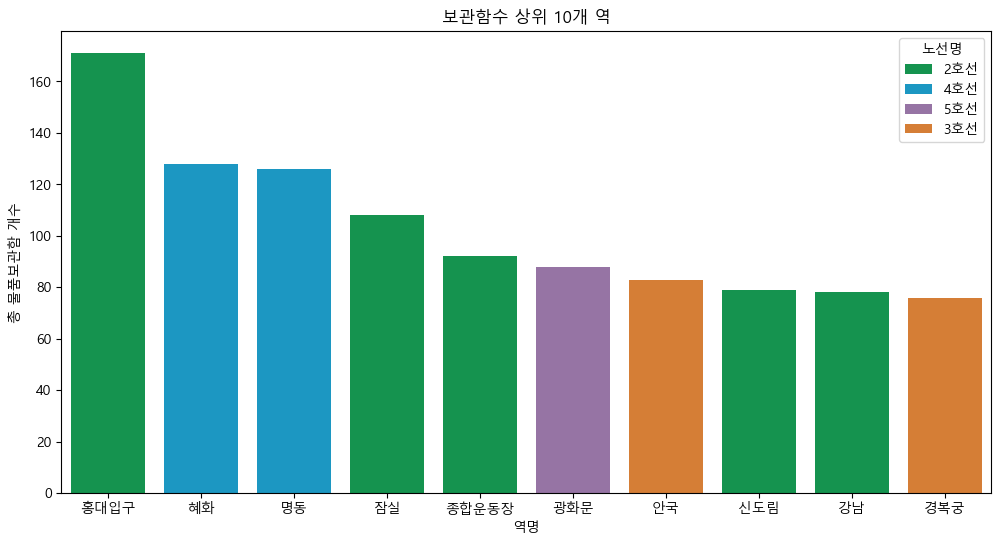

In [41]:
plt.figure(figsize=(12, 6))
colors = ["#00A84D","#00A5DE","#996CAC","#EF7C1C"]
sns.set_palette(sns.color_palette(colors))

sns.barplot(x='역명', y='물품보관함 개수', data=top_box, hue='노선명', palette=colors)
plt.xlabel("역명")
plt.ylabel("총 물품보관함 개수")
plt.title("보관함수 상위 10개 역")
plt.show()

# 이제 상위 10개 역을 그래프로 그려봤을때 보관함 수가 압도적으로 많았던 2호선의 역이 절반인 5개나 들어가 있는 것을 알수 있다
# 1등인 홍대입구역은 서울 주요 관광지인 데다가 2호선, 경의중앙선 급행, 공항철도가 지나는 역이라 외국인등이 공항 철도를 타고와서 짐을 맡기고 관광한다느느 것을 알수 있다
# 전제 노선에서 2등 5호선과 비등하던 3등 4호선의 혜화, 명동역이 상위 역중엔 2위 3위를 기록하여 두역의 비중을 알수있다
# 상위 10개 역을 알아보면 모두 유명한 관광지들인것을 알수 있다.

In [53]:
line1 = total[total["노선명"] == "1호선"][["역명","물품보관함 개수","노선명"]].nlargest(1, '물품보관함 개수')
line2 = total[total["노선명"] == "2호선"][["역명","물품보관함 개수","노선명"]].nlargest(1, '물품보관함 개수')
line3 = total[total["노선명"] == "3호선"][["역명","물품보관함 개수","노선명"]].nlargest(1, '물품보관함 개수')
line4 = total[total["노선명"] == "4호선"][["역명","물품보관함 개수","노선명"]].nlargest(1, '물품보관함 개수')
line5 = total[total["노선명"] == "5호선"][["역명","물품보관함 개수","노선명"]].nlargest(1, '물품보관함 개수')
line6 = total[total["노선명"] == "6호선"][["역명","물품보관함 개수","노선명"]].nlargest(1, '물품보관함 개수')
line7 = total[total["노선명"] == "7호선"][["역명","물품보관함 개수","노선명"]].nlargest(1, '물품보관함 개수')
line8 = total[total["노선명"] == "8호선"][["역명","물품보관함 개수","노선명"]].nlargest(1, '물품보관함 개수')
line9 = total[total["노선명"] == "9호선"][["역명","물품보관함 개수","노선명"]].nlargest(1, '물품보관함 개수')

In [47]:
line_top_9 = pd.concat([line1,line2,line3,line4,line5,line6,line7,line8,line9])

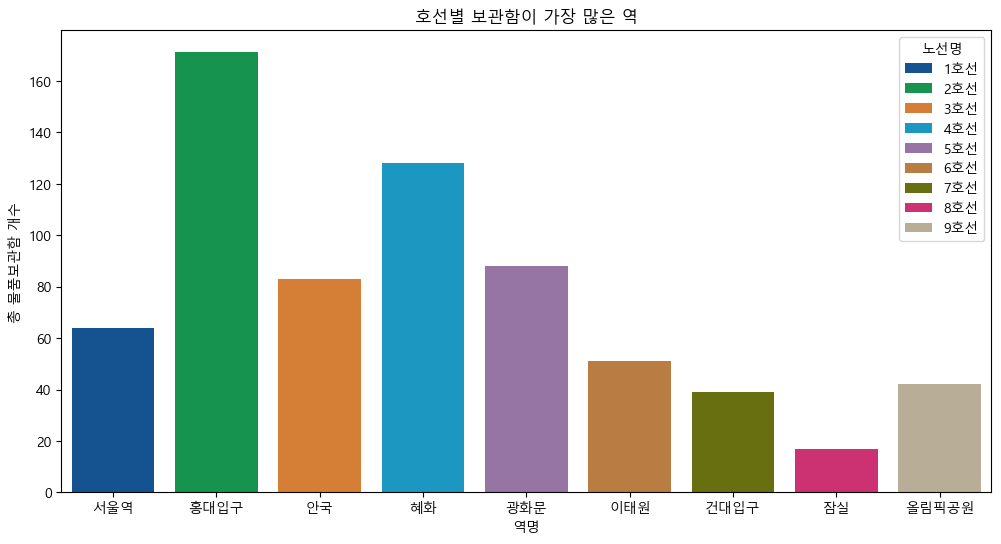

In [49]:
plt.figure(figsize=(12, 6))
colors = ["#0052A4","#00A84D","#EF7C1C","#00A5DE","#996CAC","#CD7C2F","#747F00","#E6186C","#BDB092"]
sns.set_palette(sns.color_palette(colors))

sns.barplot(x='역명', y='물품보관함 개수', data=line_top_9 ,hue='노선명',palette = colors)
plt.xlabel("역명")
plt.ylabel("총 물품보관함 개수")
plt.title("호선별 보관함이 가장 많은 역")
plt.show()

# 호선별로 가장 많은 역을 그래프로 그려봤다, 이로인해 각 역에서 물품 보관함이 가장 많은 역은 광광지라는 사실을 알수 있다

In [67]:
line1_2 = total[total["노선명"] == "1호선"][["역명","평균역이용자수","노선명"]].nlargest(1, '평균역이용자수')
line2_2 = total[total["노선명"] == "2호선"][["역명","평균역이용자수","노선명"]].nlargest(1, '평균역이용자수')
line3_2 = total[total["노선명"] == "3호선"][["역명","평균역이용자수","노선명"]].nlargest(1, '평균역이용자수')
line4_2 = total[total["노선명"] == "4호선"][["역명","평균역이용자수","노선명"]].nlargest(1, '평균역이용자수')
line5_2 = total[total["노선명"] == "5호선"][["역명","평균역이용자수","노선명"]].nlargest(1, '평균역이용자수')
line6_2 = total[total["노선명"] == "6호선"][["역명","평균역이용자수","노선명"]].nlargest(1, '평균역이용자수')
line7_2 = total[total["노선명"] == "7호선"][["역명","평균역이용자수","노선명"]].nlargest(1, '평균역이용자수')
line8_2 = total[total["노선명"] == "8호선"][["역명","평균역이용자수","노선명"]].nlargest(1, '평균역이용자수')
line9_2 = total[total["노선명"] == "9호선"][["역명","평균역이용자수","노선명"]].nlargest(1, '평균역이용자수')

In [69]:
line_top_9_2 = pd.concat([line1_2,line2_2,line3_2,line4_2,line5_2,line6_2,line7_2,line8_2,line9_2])

In [71]:
line_top_9_2

,역명,평균역이용자수,노선명
2,서울역,105211,1호선
52,잠실,155872,2호선
63,고속터미널,98210,3호선
120,혜화,71551,4호선
130,광화문,64533,5호선
179,공덕,35326,6호선
217,가산디지털단지,75960,7호선
269,문정,40188,8호선
304,신논현,60502,9호선


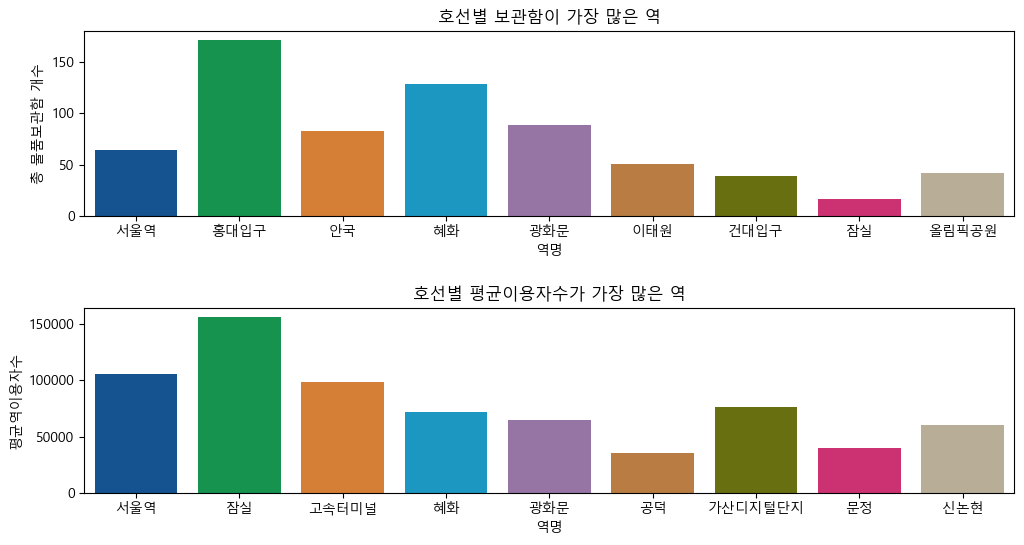

In [104]:
# plt.figure(figsize=(12, 6))
fig, axes = plt.subplots(2,1,figsize=(12, 6))
fig.subplots_adjust(hspace=0.5)

colors = ["#0052A4","#00A84D","#EF7C1C","#00A5DE","#996CAC","#CD7C2F","#747F00","#E6186C","#BDB092"]
sns.set_palette(sns.color_palette(colors))

sns.barplot(x='역명', y='물품보관함 개수', data=line_top_9 ,hue='노선명',palette = colors, ax=axes[0]).get_legend().remove()
axes[0].set_xlabel("역명")
axes[0].set_ylabel("총 물품보관함 개수")
axes[0].set_title("호선별 보관함이 가장 많은 역")

sns.barplot(x='역명', y='평균역이용자수', data=line_top_9_2 ,hue='노선명',palette = colors, ax=axes[1]).get_legend().remove()
axes[1].set_xlabel("역명")
axes[1].set_ylabel("평균역이용자수")
axes[1].set_title("호선별 평균이용자수가 가장 많은 역")

plt.show()

# 호선별로 평균역이용자수의 상위 10개역과 보관함 그래프를 비교해 봤을때 서울역, 혜화, 광화문 3곳 외에는 
# 모두 일치하지 않으므로 물품보관소는 단순히 이용자수가 많은곳에 분포하지 않고 관광지에 많이 분포한다는것을 알수 있다.
#